In [1]:
import pandas as pd

df = pd.read_csv('./source_data/spotify-2023.csv', encoding='ISO-8859-1')
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [2]:
# Clean column names (optional)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check for missing values
print(df.isnull().sum())

# Convert percent columns to real values
percent_columns = [col for col in df.columns if col.endswith('%')]
for col in percent_columns:
    df[col] = df[col] / 100.0

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


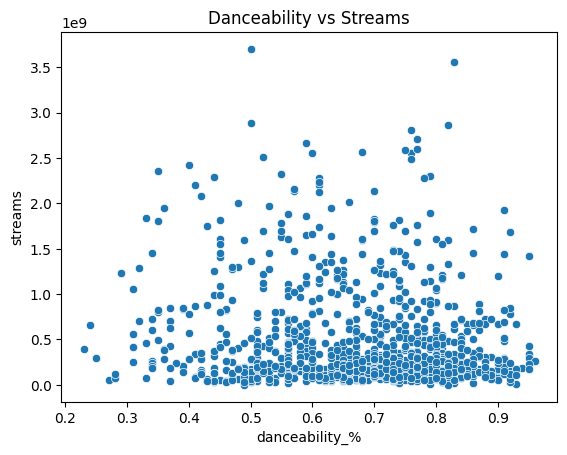

Correlation between danceability and streams: -0.11


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'streams' to numeric, coerce errors to NaN
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

sns.scatterplot(data=df, x='danceability_%', y='streams')
plt.title('Danceability vs Streams')
plt.show()

# Correlation
correlation = df['danceability_%'].corr(df['streams'])
print(f"Correlation between danceability and streams: {correlation:.2f}")

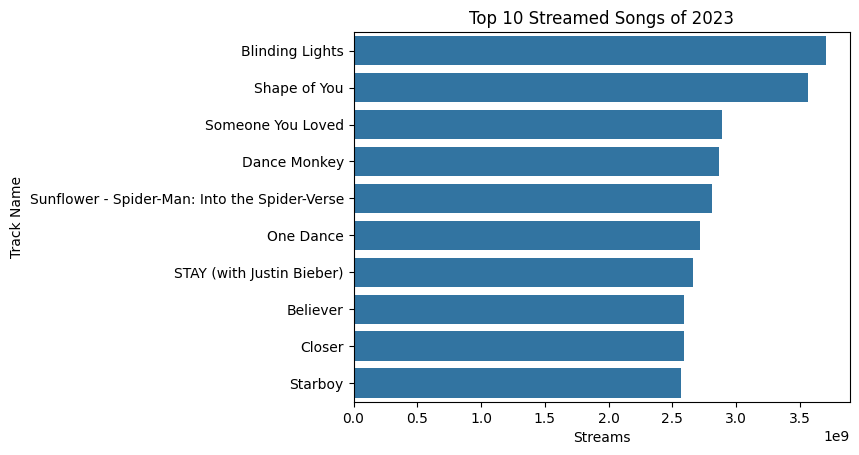

In [5]:
# Top 10 streamed songs
top_songs = df[['track_name', 'streams']].sort_values(
    by='streams', ascending=False).head(10)
sns.barplot(data=top_songs, x='streams', y='track_name')
plt.title('Top 10 Streamed Songs of 2023')
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.show()